In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [2]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [3]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [4]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [5]:
boston_df.shape

(506, 14)

In [6]:
sns.set(style='whitegrid')

#### For the "Median value of owner-occupied homes" provide a boxplot

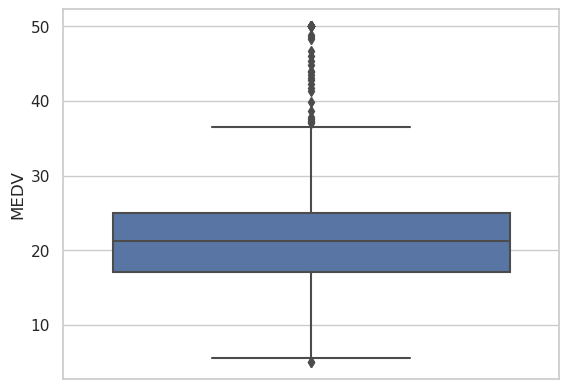

In [7]:
ax = sns.boxplot(y=boston_df['MEDV'])

#### Provide a  bar plot for the Charles river variable

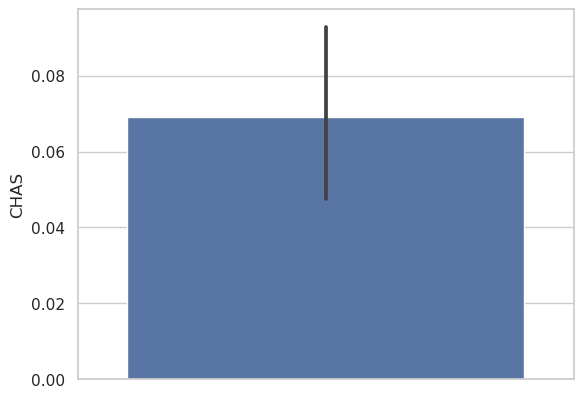

In [8]:
ax = sns.barplot(data=boston_df, y='CHAS')

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

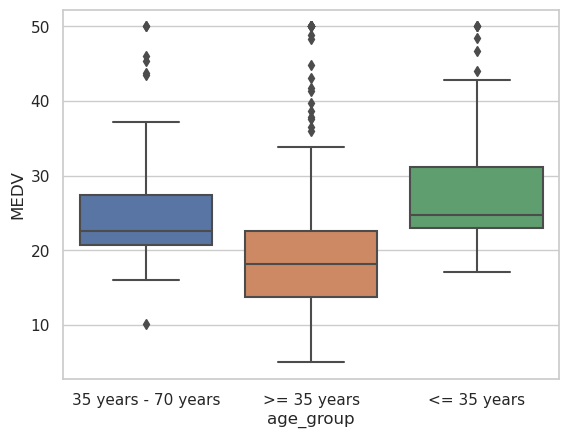

In [10]:
boston_df.loc[boston_df['AGE']<=35, 'age_group'] = '<= 35 years'
boston_df.loc[boston_df['AGE']>=70, 'age_group'] = '>= 35 years'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70), 'age_group'] = '35 years - 70 years'
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)

#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

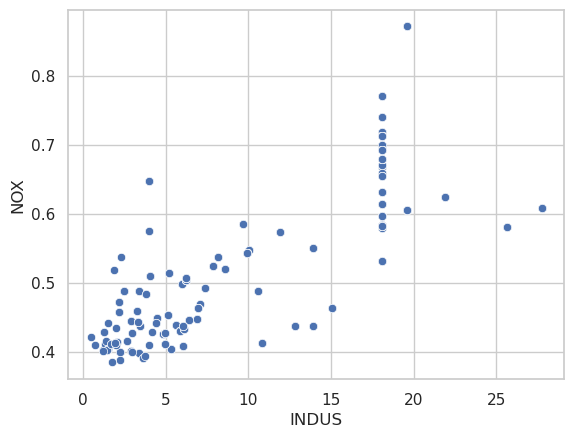

In [11]:
# it seems to be existing a positive relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)

#### Create a histogram for the pupil to teacher ratio variable

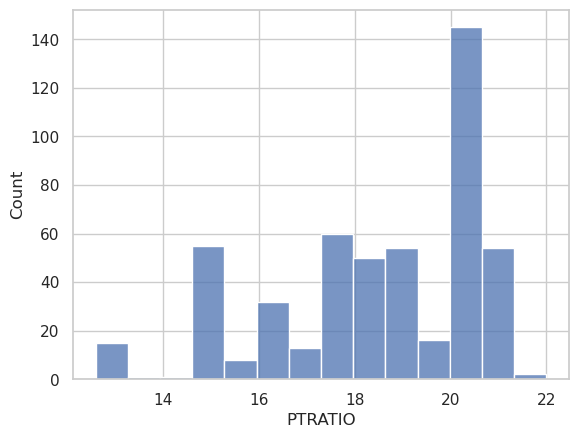

In [13]:
ax = sns.histplot(x='PTRATIO', data=boston_df)

### Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
#### State of hypothesis
#### H0: µ1 = µ2 (there is no significant difference)
#### H1: µ1 != µ2 (there is a significant difference)


<AxesSubplot:xlabel='MEDV', ylabel='Count'>

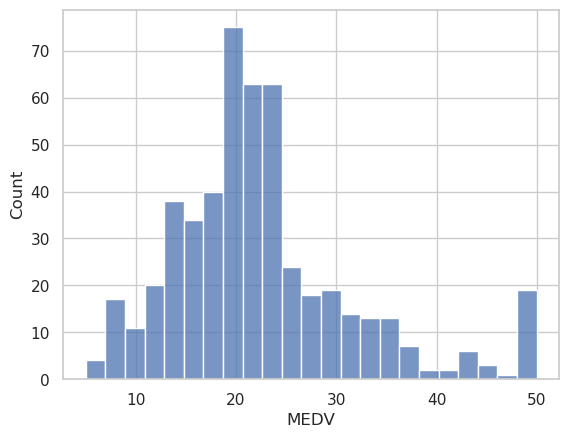

In [16]:
# check distribution of MEDV
sns.histplot(x=boston_df['MEDV'])
# normal distribution -> levene test with center=mean

In [17]:
scipy.stats.levene(boston_df.loc[boston_df['CHAS']==1, 'MEDV'],
                   boston_df.loc[boston_df['CHAS']==0, 'MEDV'], center='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [18]:
# since pvalue < 0.05, we can use t-test with "not equal variances"
scipy.stats.ttest_ind(boston_df.loc[boston_df['CHAS']==1, 'MEDV'],
                   boston_df.loc[boston_df['CHAS']==0, 'MEDV'], equal_var=False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

### Conclusion to question 1: Since p value < 0.05, we reject the H0. It means that there is a statistical significant difference in median value of houses bounded by the Charles river

### Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#### State of hypothesis
#### H0: µ1 = µ2 (there is no significant difference)
#### H1: at least one is different from the other

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data=boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


### Conclusion to question 2: Since p value < 0.05, we reject the H0. It means that there is a statistical significant difference in median value of houses bounded for each proportion of owner occupied units built prior to 1940

### Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
#### State of hypothesis
#### H0: there is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town
#### H1: there is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

In [25]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

### Conclusion to question 3: Since the correlation coefficient is 0.76 and the p value < 0.05, we reject the H0. It means that there is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

### Question 4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [26]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
prediction = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           1.21e-08
Time:                        10:29:13   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion to question 4: The p-value for "DIS" is less than 0.05, so that the correlation is statistical relevant. The coefficient 1.0916 means that the correlation between median value of owner occupied homes and the additional weighted distance to the five Boston employment centres are positive.